In [154]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [1]:
# pip install openpyxl

In [155]:
train_df=pd.read_excel('C:/Users/addiction computers/Desktop/swaping project/Data_train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [156]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [157]:
test_df=pd.read_excel('C:/Users/addiction computers/Desktop/swaping project/Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [158]:
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [159]:
print("train data :", train_df.shape)
print("test data :", test_df.shape)

train data : (10683, 11)
test data : (2671, 10)


In [160]:
df=train_df.append(test_df)
df.head()

C:\Users\addiction computers\AppData\Local\Temp\ipykernel_8292\1199090586.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [161]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [163]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [164]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [166]:
df.drop("Date_of_Journey",axis=1,inplace=True)

In [167]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

In [168]:
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_minute']=df['Arrival_Time'].str.split(':').str[1]

In [169]:
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_minute']=df['Arrival_minute'].astype(int)

In [170]:
df.drop("Arrival_Time",axis=1,inplace=True)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date             13354 non-null  int32  
 10  Month            13354 non-null  int32  
 11  Year             13354 non-null  int32  
 12  Arrival_hour     13354 non-null  int32  
 13  Arrival_minute   13354 non-null  int32  
dtypes: float64(1), int32(5), object(8)
memory usage: 1.3+ MB


In [172]:
df['Dept_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dept_minute']=df['Dep_Time'].str.split(':').str[1]

df['Dept_hour']=df['Dept_hour'].astype(int)
df['Dept_minute']=df['Dept_minute'].astype(int)


df.drop("Dep_Time",axis=1,inplace=True)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_hour     13354 non-null  int32  
 12  Arrival_minute   13354 non-null  int32  
 13  Dept_hour        13354 non-null  int32  
 14  Dept_minute      13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


In [174]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_minute        0
Dept_hour             0
Dept_minute           0
dtype: int64

In [175]:
df["Price"] = df["Price"].fillna(df.groupby("Airline")["Price"].transform("last"))

In [176]:
df["Total_Stops"] = df["Total_Stops"].fillna(df.groupby("Price")["Total_Stops"].transform("last"))

In [177]:
df.drop("Route",axis=1,inplace=True)

In [178]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Arrival_hour       0
Arrival_minute     0
Dept_hour          0
Dept_minute        0
dtype: int64

In [179]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [180]:
df['Total_Stops'].isnull().sum()

0

In [181]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':2})

In [182]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_minute
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [183]:
df['duration_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [184]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_minute,duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,4


In [185]:
df[df['duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_minute,duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,2,No info,11753.0,12,3,2019,16,55,16,50,5m


In [186]:
df.drop(6474,axis=0,inplace=True)
df.drop(2660,axis=0,inplace=True)

In [187]:
df['duration_hour']=df['duration_hour'].astype(int)

In [188]:
df.drop('Duration',axis=1,inplace=True)

In [189]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_minute,duration_hour
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,7


In [190]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [191]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [192]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [193]:
df['Airline']=labelencoder.fit_transform(df['Airline'])
df['Source']=labelencoder.fit_transform(df['Source'])
df['Destination']=labelencoder.fit_transform(df['Destination'])
df['Additional_Info']=labelencoder.fit_transform(df['Additional_Info'])

In [194]:
df.shape

(13351, 14)

In [195]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_minute,duration_hour
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,2
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,7
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,19
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,5
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,4


The purpose of our analisis is to determine which features are the most significant in the formation of the price of an air ticket (target indicator). Predict the cost of an air ticket, depending on the input data

#EDA

In [196]:
df.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_minute,duration_hour
count,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000,13351.0,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000
mean,3.977530,1.953786,1.435248,0.825781,7.407610,8805.773500,13.390607,4.710733,2019.0,13.395776,24.658827,12.512995,24.502659,10.234964
std,2.363982,1.178474,1.473404,0.674454,1.198494,4398.769787,8.439749,1.165511,0.0,6.896836,16.557178,5.736678,18.831696,8.473072
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,2.000000,0.000000,0.000000,8.000000,5158.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,2.000000
50%,4.000000,2.000000,1.000000,1.000000,8.000000,7832.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,8.000000
75%,4.000000,3.000000,2.000000,1.000000,8.000000,11753.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,15.000000
max,11.000000,4.000000,5.000000,4.000000,9.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000


<Axes: >

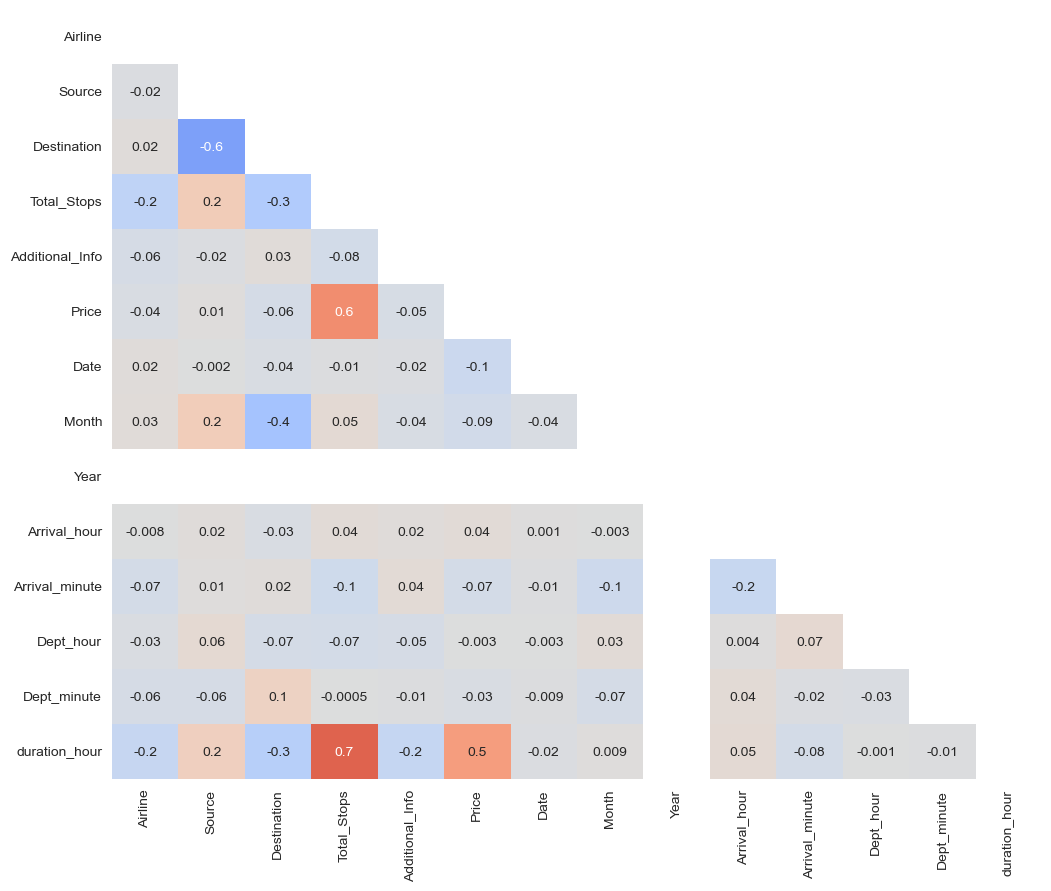

In [197]:
sns.set_style('white')
plt.figure(figsize = (12,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),annot = True, fmt='.1g', mask=matrix, vmin=-1,
            vmax=1, center= 0, cmap= 'coolwarm', cbar=False)

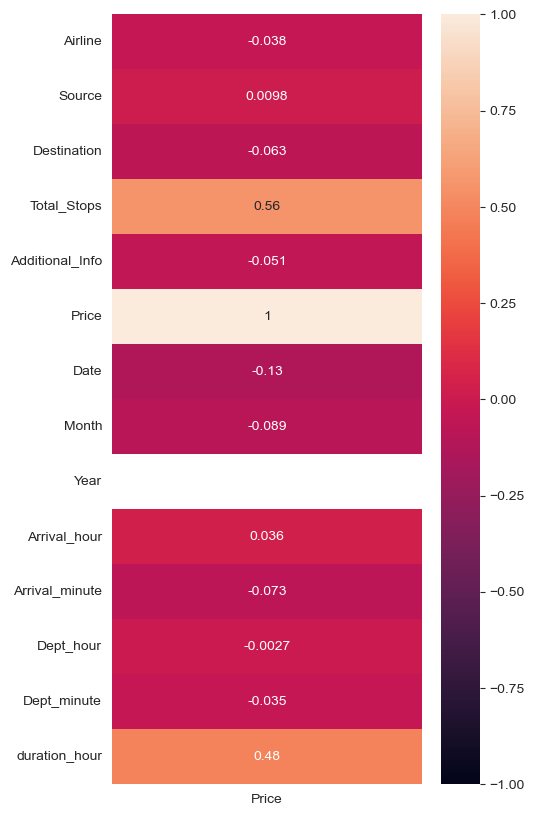

In [198]:
plt.figure(figsize=(5, 10))
sns.heatmap(df.corr()[['Price']],vmin=-1, vmax=1, annot=True);

There is a high correlation between:

->price VS number of stops
->price VS flight duration
->flight duration VS number of stops (which is quite logical)
The data is from 2019, so this feature is not displayed on the chart

In [199]:
px.histogram(df, x="Total_Stops", y="Price", histfunc='avg')

In [200]:
px.box(df, x="Price", y='Total_Stops', orientation="h")

In [201]:
px.histogram(df, x="duration_hour", y="Price", histfunc='avg')

As a result of EDA, a direct dependence of prices on the duration of the flight was confirmed. It is probably one of the most significant features into it formation.

Price jumps are especially noticeable when the flight duration is more then 5 hours (the average price almost doubles) and more then 16 hours (the average price increases by 20%)

The largest amount of emissions is observed during the flight duration up to 35 hours

The second most important feature influencing price formation is the number of stops. The median cost of a ticket without a transfer differs from the cost of a ticket with one stop by 54%. The median cost of a ticket with one stop differs from the cost of a ticket with two stops by 30% More than two transfers affect the ticket price insignificantly

Let's check for hidden patterns in the ticket price distribution using machine learning and the Sklearn, CatBoost, LightGBM and XGBoost libraries

Sklearn.LinearRegression

In [202]:
from sklearn import linear_model

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  int32  
 1   Source           13351 non-null  int32  
 2   Destination      13351 non-null  int32  
 3   Total_Stops      13351 non-null  int64  
 4   Additional_Info  13351 non-null  int32  
 5   Price            13351 non-null  float64
 6   Date             13351 non-null  int32  
 7   Month            13351 non-null  int32  
 8   Year             13351 non-null  int32  
 9   Arrival_hour     13351 non-null  int32  
 10  Arrival_minute   13351 non-null  int32  
 11  Dept_hour        13351 non-null  int32  
 12  Dept_minute      13351 non-null  int32  
 13  duration_hour    13351 non-null  int32  
dtypes: float64(1), int32(12), int64(1)
memory usage: 938.7 KB


In [124]:
X = df.drop(['Price'],axis=1)
y = df['Price']

In [203]:
reg=linear_model.LinearRegression()

In [204]:
reg.fit(df[['Airline','Source','Destination','Total_Stops','Additional_Info','Date','Month','Year','Arrival_hour','Arrival_minute','Dept_hour','Dept_minute','duration_hour']],df['Price'])

LinearRegression()

In [205]:
reg.coef_

array([ 1.65550736e+02, -2.43889142e+02,  1.52591406e+02,  3.25036692e+03,
        3.99627513e+01, -6.52015480e+01, -3.63647921e+02,  9.09494702e-13,
        8.02626876e+00, -4.18699889e+00,  3.50754959e+01, -1.06133868e+01,
        7.56729826e+01])

In [206]:
reg.intercept_

7053.183552005124

In [207]:
df.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_minute,duration_hour
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,2


In [209]:
reg.predict([[3,0,5,0,8,24,3,2029,1,10,22,20,2]])

C:\Users\addiction computers\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([6653.60930749])

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = None)
print(X_train.shape)
print(X_test.shape)

(10680, 13)
(2671, 13)


In [149]:
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_df = pd.DataFrame(scaled_X_train, columns = X_train.columns)
scaled_X_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_minute,duration_hour
0,0.727273,0.75,0.0,0.00,0.875,0.653846,1.0,0.0,0.478261,0.454545,0.391304,0.000000,0.021739
1,0.363636,0.50,0.2,0.25,0.625,0.192308,0.0,0.0,0.173913,0.454545,0.913043,0.909091,0.108696


In [150]:
lm = LinearRegression()
lm.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [151]:
print('The value of the coefficient of determination: {0:0.4}\n'.format(lm.score(X_train,y_train)))

The value of the coefficient of determination: 0.3703



In [210]:
predicted = lm.predict(X_test)

In [211]:
predicted

array([ 9584.52695644,  6610.16993191,  4374.31516233, ...,
       11971.34447275,  3942.14052654,  5248.31335999])